# Clean and analyse employee exit surveys

This project entails working with exit surveys from employees of the Department of Education, training and Employment(DETE) and the Technical and Further Education(TAFE) institue in Queensland, AUstralia.

project goal?

Present to the stakeholders some key important answers to some questions which include:

1) Are employees who worked for a period of short time resigning due to a kind of dissatisfaction? considering the employees who have worked there for a longer period of time.

2) Are younger employees resigning due to some kind of dissatisfaction while considering the older employees.

In [299]:
#start by first reading in the datasets into pandas. this will be done by first importing the necessary libraries(pandas and numpy)
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#i will read in the csv files right now using pandas
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

#lets access the information in our files using the dataframe method



In [300]:
dete_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [301]:
dete_survey.head(20)

ID                        SeparationType Cease Date DETE Start Date  \
0    1                 Ill Health Retirement    08/2012            1984   
1    2      Voluntary Early Retirement (VER)    08/2012      Not Stated   
2    3      Voluntary Early Retirement (VER)    05/2012            2011   
3    4             Resignation-Other reasons    05/2012            2005   
4    5                        Age Retirement    05/2012            1970   
5    6             Resignation-Other reasons    05/2012            1994   
6    7                        Age Retirement    05/2012            1972   
7    8                        Age Retirement    05/2012            1988   
8    9             Resignation-Other reasons    07/2012            2009   
9   10            Resignation-Other employer       2012            1997   
10  11                        Age Retirement       2012            1999   
11  12  Resignation-Move overseas/interstate       2012            2009   
12  13             Resignation-Other reasons       2012            1998   
13  14                        Age Retirement       2012            1967   
14  15            Resignation-Other employer       2012            2007   
15  16      Voluntary Early Retirement (VER)       2012            1995   
16  17             Resignation-Other reasons       2012      Not Stated   
17  18                        Age Retirement       2012            1996   
18  19                        Age Retirement       2012            2006   
19  20                        Age Retirement       2012            1989   

   Role Start Date                                      Position  \
0             2004                                Public Servant   
1       Not Stated                                Public Servant   
2             2011                               Schools Officer   
3             2006                                       Teacher   
4             1989  Head of Curriculum/Head of Special Education   
5             1997                              Guidance Officer   
6             2007                                       Teacher   
7             1990                                  Teacher Aide   
8             2009                                       Teacher   
9             2008                                  Teacher Aide   
10            1999                                       Teacher   
11            2009                                       Teacher   
12            1998                                       Teacher   
13            2000                                       Teacher   
14            2010                                       Teacher   
15            2004                                       Teacher   
16      Not Stated                                  Teacher Aide   
17            1996                                       Teacher   
18            2006                                       Cleaner   
19            1989                                       Cleaner   

   Classification                    Region  \
0         A01-A04            Central Office   
1         AO5-AO7            Central Office   
2             NaN            Central Office   
3         Primary        Central Queensland   
4             NaN                South East   
5             NaN            Central Office   
6       Secondary  Darling Downs South West   
7             NaN               North Coast   
8       Secondary          North Queensland   
9             NaN                Not Stated   
10        Primary            Central Office   
11      Secondary      Far North Queensland   
12        Primary      Far North Queensland   
13        Primary              Metropolitan   
14      Secondary        Central Queensland   
15      Secondary        Central Queensland   
16            NaN                South East   
17        Primary        Central Queensland   
18            NaN            Central Office   
19            NaN            Central Office   

           

In [302]:
#let us look closer to each columns missing value sum

dete_survey['Classification'].value_counts()

Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

In [303]:
#let us take a look at the age variation
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

In [304]:
#let us look at disability column
dete_survey['Disability'].value_counts()

Yes    23
Name: Disability, dtype: int64

In [305]:
#lets see how many missing values each columns have in our dete_survey
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

I will explore the dete_survey with large NaN values to get a deep view of what is going on

In [306]:
dete_survey['Classification'].value_counts()

Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

In [307]:
#lets see what the tafe_survey has to tell us
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [308]:

tafe_survey.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

                                     ...                                     \
0                                    ...                                      
1                                    ...                                      
2                                    ...                                      
3                                    ...                                      
4                                    ...                                      

  Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?  \
0                                                Yes                                                            
1                                                Yes                                                            
2                                                Yes                                                            
3                                                Yes                                                            
4                                                Yes                                                            

  Workplace. Topic:Does your workplace promote and practice the principles of employment equity?  \
0                                                Yes                                               
1                                                Yes                                               
2                                                Yes                                               
3                                                Yes                                               
4                                                Yes  

In [309]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

from the explored data, we could see that in out dete_survey

a) We have an unclean data and we need to do a lot of data cleaning
    
b) Both datasets have quite disimilar data recording and contains a lot of columns we may not necessary need
    
c) Some NaN values are not explicitly shown as Nan but as 'Not stated' which appeared in any format different from Nan
    
d) some rows repeated the reason for resignation.
    
e) Each dataset contains many of thesame columns but the columns have different names.
    
Now, let us start by handling the NaN and extra not needed columns in our analysis.

## cleaning column names

In [310]:
# we will start by reading the dete_survey again as csv but this time,
# we will specify what should be counted as our NaN value

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [311]:
# let us view our dete_survey again

dete_survey.head()

ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  ...   Kept informed  Wellness programs  \
0  Permanent Full-time  ...               N                  N   
1  Permanent Full-time  ...               N                  N   
2  Permanent Full-time  ...               N                  N   
3  Permanent Full-time  ...               A                  N   
4  Permanent Full-time  ...               N                  A   

   Health & Safety  Gender          Age  Aboriginal  Torres Strait  South Sea  \
0                N    Male        56-60         NaN            NaN        NaN   
1                N    Male        56-60         NaN            NaN        NaN   
2                N    Male  61 or older         NaN            NaN        NaN   
3                A  Female        36-40         NaN            NaN        NaN   
4                M  Female  61 or older         NaN            NaN        NaN   

   Disability  NESB  
0         NaN   Yes  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  

[5 rows x 56 columns]

In [312]:
# let us drop some columns that is not necessary. we wont actually need 
# from column 28 to 49
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [313]:
# let us drop some columns that is not necessary. we wont actually need 
# from column 28 to 49 dete_survey
dete_to_drop = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(dete_to_drop, axis=1)

In [314]:
dete_survey_updated.head()

ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  ...   Work life balance  Workload  None of the above  \
0  Permanent Full-time  ...               False     False               True   
1  Permanent Full-time  ...               False     False              False   
2  Permanent Full-time  ...               False     False               True   
3  Permanent Full-time  ...               False     False              False   
4  Permanent Full-time  ...                True     False              False   

   Gender          Age  Aboriginal  Torres Strait  South Sea  Disability  NESB  
0    Male        56-60         NaN            NaN        NaN         NaN   Yes  
1    Male        56-60         NaN            NaN        NaN         NaN   NaN  
2    Male  61 or older         NaN            NaN        NaN         NaN   NaN  
3  Female        36-40         NaN            NaN        NaN         NaN   NaN  
4  Female  61 or older         NaN            NaN        NaN         NaN   NaN  

[5 rows x 35 columns]

Let us work on cleaning our column name to the choice we want. we want to start our cleaning from the columns names.

In [315]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [316]:
# let us drop some columns that is not necessary. we wont actually need 
# from column 17:66 for tafe_survey
tafe_to_drop = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(tafe_to_drop, axis=1)

From the above code, i first set my NaN values to be all missing values from the dataset which is not seen as string NaN.

I had to first identify some columns that is not necessary for both of my datasets analysis for both datsets.

After the identification, i had to put each of them(differently) in a variable which is based on the columns not needed, and called them using the dataframe drop method since i am working with a dataframe with many columns

working on the cleaning of the columns names for tafe_survey dataset.

In [317]:
#let's assign the columns we want to rename to overcome ambigious nature of the column names
#we will start by assigning them to a seperate variable, for ease.
tafe_rename = {'Record ID': 'id','CESSATION YEAR': 'cease_date',
               'Reason for ceasing employment': 'separationtype', 
               'Gender. What is your Gender?': 'gender',
               'CurrentAge. Current Age': 'age', 
               'Employment Type. Employment Type': 'employment_status',
               'Classification. Classification': 'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated = tafe_survey_updated.rename(tafe_rename, axis=1)

#let's view our columns head
tafe_survey_updated.head()


id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

      ...      Contributing Factors. Study Contributing Factors. Travel  \
0     ...                              NaN                          NaN   
1     ...                                -                       Travel   
2     ...                                -                            -   
3     ...                                -                       Travel   
4     ...                                -                            -   

  Contributing Factors. Other Contributing Factors. NONE  gender     age  \
0                         NaN                        NaN  Female  26  30   
1                           -                          -     NaN     NaN   
2                           -                       NONE     NaN     NaN   
3                           -                          -     NaN     NaN   
4                           -                          -    Male  41  45   

     employment_status                 position institute_service role_service  
0  Temporary Full-time      Administration (AO)               1-2          1-2  
1                  NaN                      NaN               NaN          NaN  
2                  NaN                      NaN               NaN          NaN  
3                  NaN                      NaN               NaN          NaN  
4  Permanent Full-time  Teacher (including LVT)               3-4          3-4  

[5 rows x 23 columns]

In [318]:
tafe_survey_updated['age'].value_counts()

56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: age, dtype: int64

Generally, what i have done so far, is looking at my data and trying to understand it fully.

This data was gotten from different sources with different survey pattern. so what insights are the survey saying? which should be my goal (knowing the employee exit survey)

To analyze this data so far, what i have done is

1) importing both pandas and numpy 

2) reading my csv files(both dete_survey and tafe_survey) with pandas

3) looking at my  column headers and checking for null(NaN) or missing data in my dataset, which i had many of them

4) Dropped some columns which it is not helpful to my endpoint, or my goal.

5) Tried working on my columns for each dataset, where in dete, i replaced some formats and in tafe, i renamed some headers.

## Filtering  the Data

In [319]:
#let us first look at the reason for the employee exit from the separationtype 
#column by looking at the unique value counts for each reason.
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


The goal of our project is to analyse the resignation type of employee exit, which from the separation type column for both dataset, we could see that Resignation for dete_survey accounts for (150+91+70) which is dependent on the reason for resignation, and that of tafe_survey is 340

In [320]:
#let us reuse our series.value_counts() method to look at what happens to
#our separationtype column for dete_survey_updated

dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [321]:
#now since we have different resignations orders, let us convert them to one word which is resignation
#i will first split the resignation type and remove other words that is not resignation
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

#lets confirm if our data was updated

dete_survey_updated['separationtype'].value_counts()

#confrimed, our resignation is now together.

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [322]:
#let us reuse our series.value_counts() method to look at what happens to
#our separationtype column for tafe_survey_updated

tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [323]:
#since we are interested in the resignation of the employee exit type,
# we will work with resignation type from the separation column. but we will use dataframe.copy()
#this is so because we want to avoid the problem ofsettingwithCopy Warning.

dete_resignation = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()

In [324]:
#since we are interested in the resignation of the employee exit type,
# we will work with resignation type from the separation column. but we will use dataframe.copy()
#this is so because we want to avoid the problem ofsettingwithCopy Warning.

tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

At this point, i introudced a dataframe.copy method to copy seperately the findings from the resignation type in the separationtype column. This is so because i would encouter a SettingwithCopy warning. This warning arises as a result of chained assignment error.

## Verifying the Data

when working with real life data, it is good we avoid the error of assuming that the data we are analyzing isn't corrupted.
catching all the errors at once might not always be possible, but we have to make the data look reasonable.
i will start be verifying the cease_date and dete_start_date columns to see if the years make any meaningful sense.



observations? yes, there is inconsistency in my date format type. But we are only interested in the years. 

we will extract the year from the cease_date column

In [325]:
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [326]:
#let's look at the dete_start_date column to check out for outliers

dete_resignation['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [327]:
#let us check out for tafe_resignation column

tafe_resignation['cease_date'].value_counts(ascending=True)

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

In [328]:
# Extract the years and convert them to a float type
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1]
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignation['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

### Boxplot representation 

let us use boxplot to reresent our date column data to point out outliers

In [329]:
dete_resignation['cease_date'].describe()

count     300.00000
mean     2012.60000
std         0.75403
min      2006.00000
25%      2012.00000
50%      2013.00000
75%      2013.00000
max      2014.00000
Name: cease_date, dtype: float64

TypeError: 'str' object is not callable

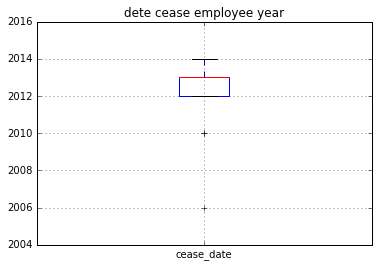

In [330]:
#box plot for dete_resignation cease_date
ax = dete_resignation.boxplot(column=['cease_date'])
plt.title("dete cease employee year")
ax.set_ylim(2004,2016)
plt.ylabel("Year")
plt.show

The box plot for dete_resignation and statistics of cease_date suggests that we recorded large number of resignation within 2012 - 2014 alone, while we have an outlier in 2006


In [ ]:
#lets work for start date on dete_survey
ax = dete_resignation.boxplot(column = ['dete_start_date'])
plt.title("dete start date")
ax.set_ylim(1963,2013)
plt.ylabel("year")
plt.show()

In [ ]:
dete_resignation['dete_start_date'].describe()

As can be seen, most of our start date occured in the late 1997  to 2010, while we outliers in periods below 1997

In [ ]:
tafe_resignation['cease_date'].describe()

In [ ]:
#lets work on tafe_resignation
ax = tafe_resignation.boxplot(column=['cease_date'])
plt.title("tafe employee cease date")
ax.set_ylim(2009,2013)
plt.ylabel("year")
plt.show()

tafe_resignation suggests that people resigned mostly betwen 2011-2012 

### Summary on date values

I did not see any years listed after the current date, and I did not see any start dates before the year 1940. There were many outliers present, but nothing that seemed inherently incorrect.

Therefore, I can verify that there aren't any major issues with the years.

### Creating a new column, institute_service in dete_resignation

In [ ]:
# let us review our dete_resignation columns again.


dete_resignation.head()

Having our goal in mind which is checking out on whether resignation of employees was as a result of dissatisfaction.
we will do it by comparing both employees with long and short service rate.(which will be done by substracting start date and cease date of the various employees)
we will create a column in dete_resignation column, and term it institue_service, since we already have a corresponding column description in tafe_resignation.

from the dete_resignation column ahead, we can see that we can infer length of service from the difference between cease_date and dete_start_date.

Now let us create a new column that would refer to the length of service


In [ ]:
#creating length of service column will be done by subtracting the dete_start_date from the cease_date

institute_service = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

#let us assign this variable as a column in our dete_resignation data

dete_resignation['institute_service'] = institute_service

print(dete_resignation['institute_service'])


In [ ]:
ax = dete_resignation.boxplot(column=['institute_service'])
plt.title("dete work years")
plt.ylabel("year")
plt.show()

In [ ]:
dete_resignation['institute_service'].describe()

dete_resignation insitute_service boxplot suggests that majority of recorded years work lies between 3 - 16 years.

We have successfully created a new column in our dete_resignation column known as institute_service, which takes care of the difference between the start and end work date of the exited employees (which is known as years of service).

Observations made from the result:

from our observations, we can see that though we have succesfully crated a column termed institute_service, which calculates the length of service by finding the years range between start and end work date of employees(years of service), some rows still shows NaN.

#### tafe institute service

In [ ]:
tafe_resignation['institute_service'].value_counts()

## Identifying Dissatisfied Employees

In [ ]:
dete_survey_updated.info()

In [ ]:
tafe_survey_updated.info()

We are going to select the columns necessary to categorie employees as 'dissatisfied'. 

Going through the tafe_survey_updated, i think, 3 columns would be necessary for this.

1) Contributing Factors:  Dissatisfaction(are they tired of the whole system?)

2) Contributing Facctors: Job Dissatisfaction(Are they tired of the job?) and if so, why?? the next step to this question is, is it because of education advancement(if they are young), this will make me to go for the next column selection which will be

for dete_survey_updated i will select the following:

1) job_dissatisfaction

2) dissatisfaction_with_the_department

3) physical_work_environment

4) lack_of_recognition

5) lack_of_job_security

6) work_location

7) employment_conditions

8) work_life_balance

9) workload

Hence, our next step is to see if any of the employees matches this discription (respectively for each survey) and we will classlify them as dissatisfied in a new column.

in Summary:
True: indicates a person resigned because they were dissatisfied in some way

False: indicates a person resigned because of a reason other than dissatisfaction with the job

NaN: indicates the value is missing



In [ ]:
#let us verify the unique content of each selected contributing factors in tafe_resignation
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts()

#shows that contributing factor.dissatifaction numbers 55 recorded cases, while others are represented as (-)

In [ ]:
##let us verify the unique content of each selected contributing factors in tafe_resignation
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts()
#shows that contributing factor. job dissatifaction numbers 62 recorded cases, while others are represented as (-)

In [ ]:
# let us define a function that would carry out this operation for us.

def considered_value(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True
#let us now create a column termed dissatisfied that fits in with this defined function

tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction', 
                                                     'Contributing Factors. Job Dissatisfaction', 
                                                 ]].applymap(considered_value).any(axis=1, skipna=False)


tafe_resignation_up = tafe_resignation.copy()
tafe_resignation_up['dissatisfied'].value_counts(dropna=False)

from this, it can be seen that i have 91 cases of dissatisfaction for tafe_resignation

In [ ]:
# lets do the same for dete_resignation
dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)

dete_resignation_up = dete_resignation.copy()

dete_resignation_up['dissatisfied'].value_counts(dropna=False)

from this, it can be seen that i have 149 cases of dissatisfaction for dete_resignation.

So far, we have created a new column(with required or needed variables) seperately for our analysis for both data survey respectively which shows the reason (which surrounds dissatisfaction) of employees exit


## Combining the Data 


Summary of what i have done so far:

- Renamed the columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way


Let us try to aggregate the datasets. Our end goal is aggregating data according to the institute_service column(which we earlier on created)



In [ ]:
#we will add a new column to be able to differentiate between the intitute_service column of both data surveys or dataframes easily.

dete_resignation_up['institute'] = "DETE"
tafe_resignation_up['institute'] = "TAFE"

#combining the dataframe
combined = pd.concat([dete_resignation_up, tafe_resignation_up], ignore_index=True) 

#let us verify our data concatenation 
combined.notnull().sum().sort_values()


In [ ]:
#since we only need the relevant data for our analyses, let us drop those which are not relevant
#from observation, we are going to drop data with less than 500 non null values because they are not important for our amalyses.

combined_update = combined.dropna(thresh=500, axis=1).copy()
combined_update.info()

In [ ]:
combined_update['institute'].value_counts()

in combining the data, we first created a column, which would make it easier to identify and spot each dataset(between DETE and TAFE)

After that, we were able to remove the data not necessary for our analyses by using dropna method

## Cleaning the Service column

In [ ]:
combined['institute_service'].value_counts()

working of the institute service column in important since there are variations in the years range.

hence, we will convert this numbers into categories. Hence, our analysis of this article(https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) which makes cases of understanding employeees needs based on career stage than age.

our classification will be:

New: Less than 3 years at a company

Experienced: 3-6 years at a company

Established: 7-10 years at a company

Veteran: 11 or more years at a company

now let us categorize the institute_service column

In [ ]:
#let us extract the years of service from the institute_service and change the type to str which is based on regex method

combined_update['institute_service_up'] = combined_update['institute_service'].astype('str').str.extract(r'(\d+)', expand=False)
combined_update['institute_service_up'] = combined_update['institute_service_up'].astype('float')

#let us verify our changes and compare with the combined_update['institute_service']

combined_update['institute_service_up'].value_counts()

In [ ]:
# Change values to float
combined_update['institute_service_up'] = combined_update['institute_service_up'].astype(float)
combined_update['institute_service_up'].describe()

In [ ]:
combined_update['institute_service_up'].value_counts(dropna=False)

we have succesfully converted the institute_service_up to float values with characters.

Now let us analyse our data with the above grouped classification for age, by creating a function that will do the mapping. the grouping will be like:

New: Less than 3 years at a company

Experienced: 3-6 years at a company

Established: 7-10 years at a company

Veteran: 11 or more years at a company

In [ ]:
#let us create a function that will map the age classification.

def institute_map(element):
    if element < 3:
        return "New"
    elif element >=3 and element <= 6:
        return "Experienced"
    elif element >=7 and element <= 10:
        return "Established"
    elif pd.isnull(element):
        return np.nan
    else:
        return "Veteran"

combined_update['service_cat'] = combined_update['institute_service_up'].apply(institute_map)

combined_update['service_cat'].value_counts(dropna=False)
    

I have created a column category service_cat that categorizes employees according to the amount of years spent in their workplace.

## Performing Analysis 

In [ ]:
#verifying our dissatisfied column
#we have 392 false value, 251 true and 8 missing values
combined_update['dissatisfied'].value_counts(dropna=False)

In [ ]:
#since i have missing values as nan, i will update my false values to include nan
#since the false values appears most

combined_update['dissatisfied'] = combined_update['dissatisfied'].fillna(False)

In [ ]:
#calculating the percentage of dissastisfied employees in each service_cat group

dissatisfied_percent = combined_update.pivot_table(index='service_cat', values='dissatisfied')

%matplotlib inline
dissatisfied_percent.plot(kind='bar', rot=30)


consdering the job dissatisfaction from both dataset, Established(more than 7-10years) seems like they are more likely to exit due to dissatisaction. we will look on the next dataset to finalize

In [ ]:
gender_dist = combined_update['gender'].value_counts(dropna=False)
print(gender_dist)

In [ ]:
combined_update.info()

In [ ]:
combined_update['age'].value_counts(dropna=False)

In order to answer the question about dissatisfaction and age, I need to evaluate and clean the "age" column, since my age column seems not to be good and neat for analysis.

from the age column, there are irregularities in the different rows, some contain "-" while others dont. i will make it in uniform by converting those without "-" to contain "-", and i will replace 56 or older to 56-60.

In [ ]:
# first, let me convert the age column to a string type

combined_update['age'] = combined_update['age'].astype(str)

combined_update['age_cleaned'] = combined['age'].str.replace("  ", "-").str.replace("56 or older", "56-60")

combined_update['age_cleaned'].value_counts(dropna=False)

This section, I cleaned the age column in order to have consistent values across the dataset. i will use this information in analysing the dissastifaction rate of each employee catgory

### Analysis on dissastifaction of the employees

We are going to look on the resignation of the employees under the following headings

1) Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [ ]:
combined_update['dissatisfied'].value_counts()

### Career stage dissastifaction plot 

We will look on young resignation against old resignation category. Are new employees resigning more than the veterans or old employees? what should be the cause? for us to that, we will have to convert our data to pivot_table

In [ ]:
#let us calculate the percentage of dissastified employees with there category

category_per_dis = combined_update.pivot_table(index = 'service_cat', values='dissatisfied')
print(category_per_dis)

In [ ]:
#lets plot this using bar chart
category_per_dis.plot(kind='bar', legend=False, rot=30, title='Resignation: Career Stage and Dissatisfaction')
plt.xlabel("Employee stage")
plt.ylabel("percent dissatisfied")
plt.show()

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

New employees of about 29.5% resigned due to dissastifaction, while Established of about 7-10 years of experience has the highest resigning rate with about 51.6% while veterans with about 48% rate resigned and Experienced at about 34% resigned 

###Summary, New employees have a lesser resigning rate than those with higher work years experience.

### Age dissastifaction rate

lets work with the age range. recall that we have a NaN value, lets drop it from this plot.

In [ ]:
combined_update['age_cleaned'].value_counts()

In [ ]:
#lets convert the age catgory to pivot table to ease the plot
age_dis_per = combined_update.pivot_table(index='age_cleaned', values='dissatisfied')
age_dis_per

In [ ]:
# lets visualize the plot
age_dis_per.plot(kind='bar', rot=90, title='Resignation: Age and Dissatisfaction', legend=False)
plt.xlabel('Age')
plt.ylabel('dissatisfied percent')
plt.show()

Employees 20 years younger are the least to resign at the rate of 20%, while those with more than 61 years of age resign the most at the rate of 52%

### Summary

The analysis so far has showed that the groups most at risk of resigning due to dissatisfaction are the older employees (61 or older) and those who have been at the company 7 to 10 years (Established). The groups least at risk are the employees who are 21 and younger and those who have been at the company less than three years (New).

### Age Impact and Career dissatisfaction rate

I want to investigate into that a bit further, and look at which combination of career stage and age is most likely to claim leaving due to dissatisfaction. I will also look into the effects of institute and position.

In [ ]:
# let me create a pivot table for age, career stage and dissastifaction
age_car_dis_pt = combined_update.pivot_table(index="service_cat",columns="age_cleaned",values="dissatisfied")
age_car_dis_pt.head()

In [ ]:
# now lets plot this into a figure plot.
fig = plt.figure(figsize=(16,16))
fig.suptitle('Dissatisfied Employee by Career stage and Age', fontsize=16)

#let us plot for New 
ax = plt.subplot('221')
#to select only the new role,
age_car_dis_pt.iloc[2,:].plot(kind='bar', ax= ax)
plt.ylabel("Percent Dissatisfied")
ax.set_title("New: Less than 3 years")
ax.set_ylim([0, .8])

#lets plot for established
ax = plt.subplot('222')
#to select only the new role,
age_car_dis_pt.iloc[0,:].plot(kind='bar', ax= ax)
ax.set_title("Established: 3 - 6 years")
ax.set_ylim([0, .8])

#lets plot for experienced
ax = plt.subplot('223')
#to select only the new role,
age_car_dis_pt.iloc[1,:].plot(kind='bar', ax= ax)
plt.ylabel("Percent Dissatisfied")
ax.set_title("Experienced: 7 - 10 years")
ax.set_ylim([0, .8])

#lets plot for veteran

ax = plt.subplot('224')
#to select only the new role,
age_car_dis_pt.iloc[3,:].plot(kind='bar', ax= ax)
ax.set_title("New: more than 11 years")
ax.set_ylim([0, .8])

plt.show()

In [ ]:
#using for loop to achieve the same result
fig = plt.figure(figsize=(16,16))
fig.suptitle('Dissatisfied Employee by Career stage and Age', fontsize=16)

for_plot = (("221", 2, "New: less than 3 years"),
            ("222", 0, "Established: 3-6 years"),
            ("223", 1, "Experienced: 7-10 years"),
            ("224", 3, "veteran: more than 11 years")
           )
for sn, id, title in for_plot:
    ax = plt.subplot(sn)
    age_car_dis_pt.iloc[id,:].plot(kind="bar", ax= ax)
    ax.set_title(title)
    ax.set_ylim([0, .8])
    plt.xlabel("Employee Age")
    plt.ylabel("Percent Dissatisfied")

plt.show()

The new plot, Experienced and Veteran showed that the resignation rate rises on the inxrease for those workers with more than 61 of years.

Thus this was different for Established(between 3-6 years) which sees themselves in the high rsignation 

### DETE Resignation and TAFE rsignation

Now the question still rooms, amongst the different institute, which recorded the highest resigning rate?

I will work in comparing the resignation rate between the two institute.

let us first view the institute column

In [ ]:
#lets view the total data in each institute survey
combined_update['institute'].value_counts()

In [ ]:
#We can see that Tafe seems to record more survey, lets see how it will affect the resignation rate

institute_plot = combined_update.pivot_table(index='institute', values='dissatisfied')

#let us put our data in a plot visual

institute_plot.plot(kind='bar', rot=0, title='Resignation due to Dissatisfaction per Institute', legend=False)
plt.xlabel='Institute'
plt.ylabel='Percent Dissatisfied'
plt.show()

### Effects of Career Stage on Dissatisfaction per Institute

In [ ]:
#let us first convert the require column to pivot table
inst_car_plot = combined_update.pivot_table(index='service_cat', columns='institute', values='dissatisfied')
inst_car_plot.head()

In [ ]:
#let us now plot our career stage on dissatisfaction per institute

inst_car_plot.plot(kind='bar', rot=0, title='Effects of Career Stage on Dissatisfaction per Institute')
plt.xlabel='career stage'
plt.ylabel='percent dissatisfied'
plt.legend(loc='upper right', fontsize='small')
plt.show()

Dete Established saw the highest resigning rate from the dete data survey by about 60% based on career stage category, which is followed by the veteran(more than 61 years older) and in Tafe, it seems that resignation is relatively constant across the levels but, established saw the highest resigning rate. 

It could be looked further for the reason of resignation of established.

In [ ]:
combined_update['gender'].value_counts()

In [ ]:
gen_plot = combined_update.pivot_table(index='service_cat', columns='gender', values='dissatisfied')
gen_plot

In [ ]:
gen_plot.plot(kind='bar', rot=0, title='gender resignation rate by service category')
plt.ylabel='percent dissatisfied'
plt.xlabel='gender resignation'
plt.legend(loc='best', fontsize='small')
plt.show()

More females contributed to the resignation rate in the employee exit.

### Institute Summary

The differences between the institutes look very significant, but it is important to remember that there were 9 columns to describe dissatisfaction in the DETE survey, and two in TAFE. 

### Resignation effect on position

lets us look ath row position played in this resignation of employees to see which position in each survey got tired quickly

let us look at our position setting for both survey.

In [ ]:
combined_update['position'].value_counts()

To get a bigger picture of what each survey is saying, and how to further clean or relace position names which are not matching or will ease our analysis, we will have to seperate and look at each survey independently

In [ ]:
print('Dete position')

combined_update.loc[combined_update['institute']=="DETE", "position"].value_counts()

In [ ]:
combined_update.loc[combined_update['institute']=="TAFE", "position"].value_counts()

Now we can see clearly that our Institute position in tafe survey needs some cleaning. we have to rename some measures.



In [ ]:
tafe_pos_rename = {'Administration (AO)' : 'Administration', 
                   'Teacher (including LVT)' : 'Teacher',
                   'Professional Officer (PO)' : 'Professional Officer',
                   'Operational (OO)' : 'Operational',
                   'Technical Officer (TO)' : 'Technical Officer',
                   'Executive (SES/SO)' : 'Executive'}
combined_update = combined_update.replace({"position" : tafe_pos_rename})
combined_update.loc[combined_update['institute']=="TAFE", "position"].value_counts()

The position for Tafe dateset column has been corrected. Now lets see what th data shows for position level and the rate of resignation.

we will convert it into pivot_table first before we start visualizing

In [ ]:
pos_val = combined_update.pivot_table(index="position",values="dissatisfied") # mean is default arg
pos_val.plot(kind="bar", rot = 90, legend=False,
                title="Resignation due to Dissatisfaction per Position and Institute")
plt.xlabel("Position")
plt.ylabel("Percent Dissatisfied")
plt.show()

From the graph, we could see that the Guidance value recorded the highest value to 1 while others ranges between 0 and 1. This could be as a large response of the data.

Nows visualize individually.

In [ ]:
pos_num_counts = combined_update["position"].value_counts()
pos_num_counts.plot(kind="bar", color = "green", title="Employees per Position")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.show()

We could now finalize that from our combined dataset, Teachers showed the highest form of dissatisfaction rate with their resignations

Now let us visualize it indivudually and see what indiviual dataset has to say about the resignation

TypeError: 'str' object is not callable

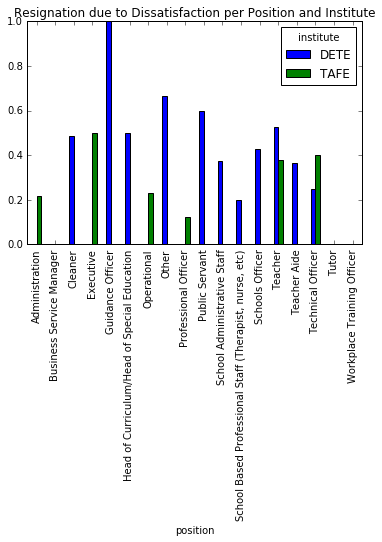

In [331]:
pos_inst_cat = combined_update.pivot_table(index="position",columns="institute",values="dissatisfied") # mean is default arg
pos_inst_cat.plot(kind="bar", rot = 90,
                title="Resignation due to Dissatisfaction per Position and Institute")
plt.xlabel("Position")
plt.ylabel("Percent Dissatisfied")
plt.legend(loc='best',fontsize="small") 
plt.show()

We have analysed the age, position and institute category to finalize the resignation of employees and its dissatisaction rate